In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
dataset = pd.read_csv('micron.csv')

In [37]:
dataset

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,y
0,0.154163,0.740050,0.263315,270.043359,0.533739,0.014575,0.918747,0.900715,0.033421,0.956949,...,0.485377,0.768134,0.160717,0.764560,0.020810,0.135210,Very Cold,0.116273,0.309898,4
1,0.671453,0.471230,0.816168,825.541438,0.289587,0.733126,0.702622,0.327569,0.334648,0.978058,...,0.177564,0.962597,0.419250,0.424052,0.463149,0.373723,Cold,0.465508,0.035168,1
2,0.084273,0.732521,0.636200,642.175709,0.027908,0.300170,0.220853,0.055020,0.523246,0.416370,...,0.461440,0.894743,0.605778,0.603356,0.443872,0.480047,Cold,0.888448,0.208500,2
3,0.944581,0.073470,0.595152,595.983158,0.031151,0.665257,0.637385,0.862465,0.941638,0.445627,...,0.946556,0.857191,0.688928,0.003288,0.900103,0.919865,Very Hot,0.005909,0.642926,0
4,0.385217,0.595742,0.610807,617.289384,0.599619,0.312284,0.069874,0.800734,0.911434,0.194675,...,0.333832,0.778473,0.135435,0.191711,0.402589,0.786844,NaN,0.253808,0.109485,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,0.457958,0.642367,0.525224,526.211535,0.908973,0.041879,0.314760,NaN,0.618821,0.473398,...,0.116284,0.127008,0.853264,0.204691,0.824045,0.232227,Very Cold,0.242143,0.718839,4
17996,0.398603,0.576079,0.079975,83.556340,0.478481,0.843795,0.256441,0.849709,0.620136,0.251116,...,0.093917,0.185403,0.808505,0.095233,0.776949,0.841992,Very Hot,0.946554,0.150952,0
17997,0.455671,0.098704,0.417840,421.420511,0.302754,0.591551,0.470392,0.748002,0.746729,0.744290,...,0.745924,0.440073,0.682202,0.209295,0.832271,0.880627,Very Hot,0.099026,0.746490,0
17998,0.052394,0.896098,0.731967,735.626798,11.000000,0.314701,0.423992,0.246733,0.446040,0.296398,...,0.832404,0.273394,0.293221,0.898085,0.427504,0.257505,Cold,0.212691,0.293841,2


In [38]:
dataset.shape# check no of rows and columns in the dataset

(18000, 30)

In [39]:
dataset.isnull().sum()# check for sum of null rows per columns

0     0
1     1
2     0
3     5
4     2
5     2
6     1
7     2
8     1
9     7
10    1
11    2
12    2
13    2
14    2
15    2
16    0
17    4
18    2
19    5
20    1
21    3
22    3
23    2
24    4
25    2
26    6
27    5
28    6
y     0
dtype: int64

In [40]:
dataset.columns[dataset.isnull().any()]# columns have null rows

Index(['1', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14',
       '15', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27',
       '28'],
      dtype='object')

In [41]:
sum(dataset.duplicated())# checked whether any dublicates rows are present or not

0

In [42]:
# using boxplot to check for outliers where large no of outliers are present or not

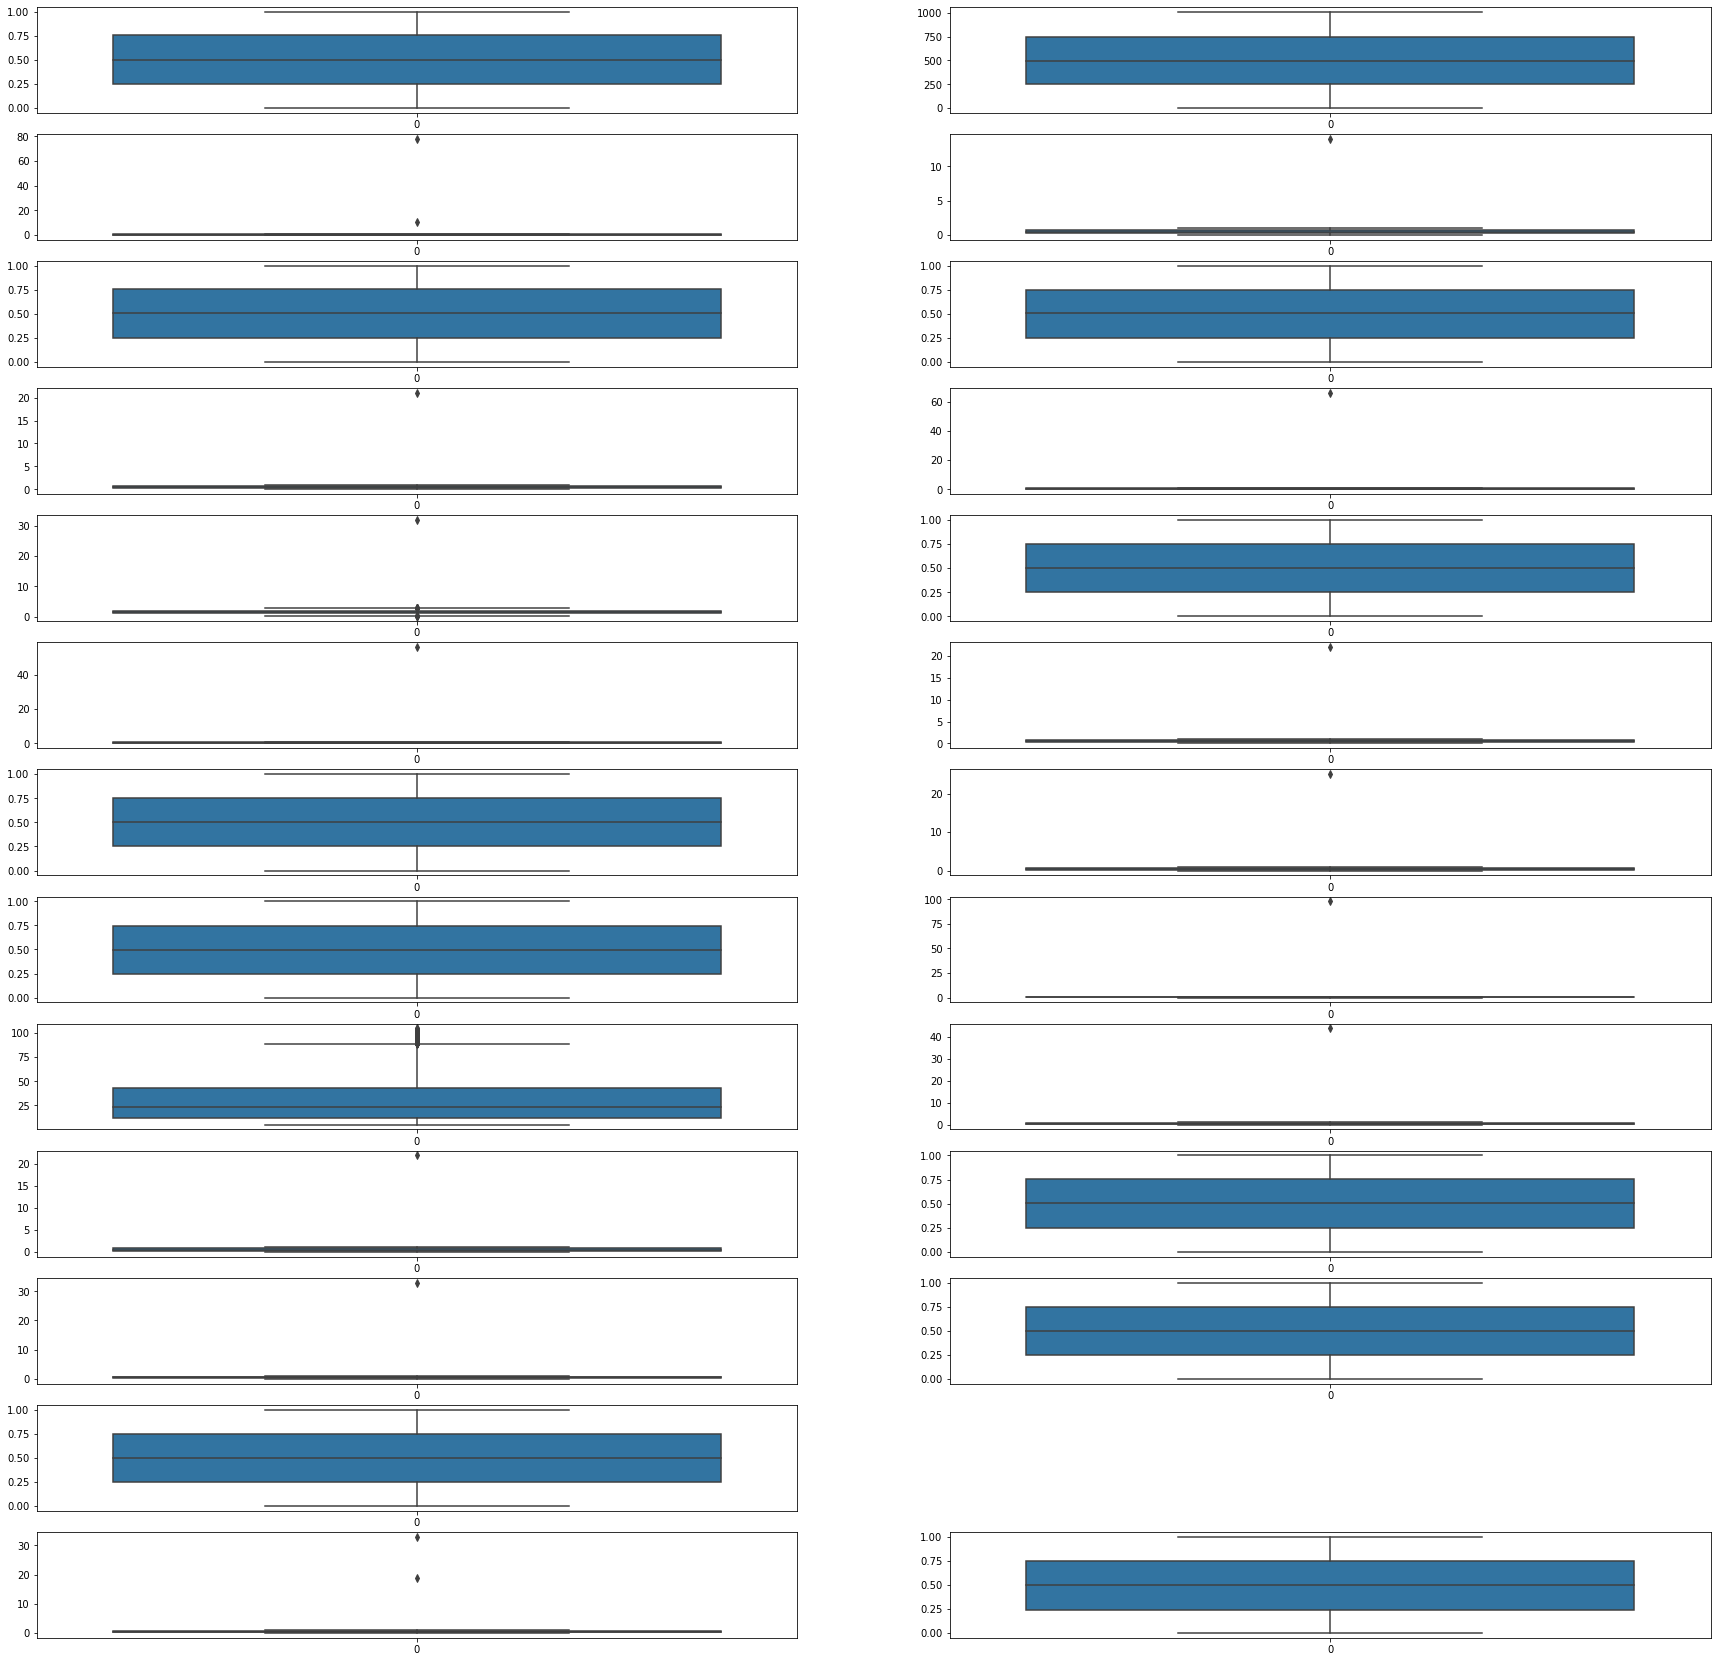

In [43]:
plt.figure(figsize=[30,30])
j=0
for i in dataset.columns[dataset.isnull().any()]:
    j=j+1
    
    if i!='26':
        plt.subplot(13,2,j)
        sns.boxplot(data=dataset[i],orient='v')
        
    
    
    
    
    
    

In [44]:
'''clearly from picture we can see columns '4', '5', '8', '9', '10', '12', '13',
       '15', '18', '19', '20', '21', '22', '23', '27' have some outliers
           ''' 

"clearly from picture we can see columns '4', '5', '8', '9', '10', '12', '13',\n       '15', '18', '19', '20', '21', '22', '23', '27' have some outliers\n           "

In [45]:
# checking using Z-score techinique ahd selecting confidence intervals as 95% and significance level as 5%
y=[]
def find_outliers(a):
    threshold=3
    mean=np.mean(a)
    std=np.std(a)
    for i in a:
        z_score=(i-mean)/std
        if abs(z_score)>threshold:
            y.append(i)
    return y

In [46]:
# most of the outliers are present in column no 19 visible in boxplot

In [47]:
len(find_outliers(dataset['19']))

87

In [48]:
dataset.describe()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,27,28,y
count,18000.000000,17999.000000,18000.000000,17995.000000,17998.000000,17998.000000,17999.000000,17998.000000,17999.000000,17993.000000,...,17995.000000,17999.000000,17997.000000,17997.000000,17998.000000,17996.000000,17998.000000,17995.000000,17994.000000,18000.000000
mean,0.497304,0.502687,0.494937,499.892212,0.503220,0.502215,0.504697,0.502609,0.500514,0.499124,...,29.618674,0.502583,0.502572,0.501805,0.498935,0.497505,0.499214,0.501101,0.496228,2.020111
std,0.290409,0.289836,0.288788,288.810797,0.649628,0.305166,0.289100,0.287540,0.326781,0.567464,...,21.792547,0.434148,0.331018,0.287901,0.376369,0.287846,0.288174,0.401123,0.288115,1.612578
min,0.000027,0.000091,0.000004,1.760119,0.000010,0.000005,0.000062,0.000006,0.000028,0.000012,...,5.000000,0.000128,0.000040,0.000025,0.000014,0.000168,0.000021,0.000010,0.000043,0.000000
25%,0.240962,0.253751,0.246218,250.648463,0.252343,0.251844,0.252453,0.255681,0.251511,0.245572,...,11.643962,0.248253,0.250221,0.251955,0.246204,0.250703,0.250295,0.250837,0.243309,0.000000
50%,0.496238,0.502398,0.490495,495.869828,0.496363,0.502624,0.506607,0.507720,0.496498,0.492539,...,23.150175,0.500485,0.504248,0.505243,0.496341,0.496521,0.498162,0.494534,0.493672,2.000000
75%,0.748868,0.756206,0.743803,748.580198,0.745778,0.751620,0.757879,0.747877,0.750601,0.744947,...,42.680962,0.751306,0.753712,0.750784,0.745365,0.743042,0.749331,0.746832,0.745603,4.000000
max,0.999991,0.999966,0.999946,1008.672530,78.000000,14.000000,0.999948,0.999886,21.000000,66.000000,...,104.947610,44.000000,22.000000,0.999909,33.000000,0.999900,0.999859,33.000000,0.999877,4.000000


In [49]:
# check for the outliers but in the dataset the outliers don't have much significent impact which will cause harm to our analysis
# as the mean remains almost the same.

In [50]:
# now we have to fill the null values

In [51]:
dataset[['1', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14',
       '15', '17', '18', '19', '20', '21', '22', '23', '24', '25', '27',
       '28']]# have null values

,1,3,4,5,6,7,8,9,10,11,...,18,19,20,21,22,23,24,25,27,28
0,0.740050,270.043359,0.533739,0.014575,0.918747,0.900715,0.033421,0.956949,1.852883,0.137209,...,0.552038,33.773638,0.485377,0.768134,0.160717,0.764560,0.020810,0.135210,0.116273,0.309898
1,0.471230,825.541438,0.289587,0.733126,0.702622,0.327569,0.334648,0.978058,1.364839,0.624582,...,0.995138,44.868382,0.177564,0.962597,0.419250,0.424052,0.463149,0.373723,0.465508,0.035168
2,0.732521,642.175709,0.027908,0.300170,0.220853,0.055020,0.523246,0.416370,0.799119,0.048219,...,0.506556,29.959908,0.461440,0.894743,0.605778,0.603356,0.443872,0.480047,0.888448,0.208500
3,0.073470,595.983158,0.031151,0.665257,0.637385,0.862465,0.941638,0.445627,2.441488,0.669958,...,0.405958,43.867159,0.946556,0.857191,0.688928,0.003288,0.900103,0.919865,0.005909,0.642926
4,0.595742,617.289384,0.599619,0.312284,0.069874,0.800734,0.911434,0.194675,1.782042,0.210608,...,0.511643,38.152374,0.333832,0.778473,0.135435,0.191711,0.402589,0.786844,0.253808,0.109485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,0.642367,526.211535,0.908973,0.041879,0.314760,NaN,0.618821,0.473398,1.445966,0.560688,...,0.373453,12.663173,0.116284,0.127008,0.853264,0.204691,0.824045,0.232227,0.242143,0.718839
17996,0.576079,83.556340,0.478481,0.843795,0.256441,0.849709,0.620136,0.251116,1.726286,0.722080,...,0.739399,66.983756,0.093917,0.185403,0.808505,0.095233,0.776949,0.841992,0.946554,0.150952
17997,0.098704,421.420511,0.302754,0.591551,0.470392,0.748002,0.746729,0.744290,1.965123,0.216834,...,0.153534,8.794238,0.745924,0.440073,0.682202,0.209295,0.832271,0.880627,0.099026,0.746490
17998,0.896098,735.626798,11.000000,0.314701,0.423992,0.246733,0.446040,0.296398,1.116766,0.424778,...,0.930610,75.159494,0.832404,0.273394,0.293221,0.898085,0.427504,0.257505,0.212691,0.293841


In [3]:
for i in dataset.columns[dataset.isnull().any()]:
    if i!='26':
        dataset[i]=dataset[i].fillna( dataset[i].mean())# replacing the null values of numerical values with the mean of their
        #respective column

In [4]:
dataset['26'].value_counts().index[0]

'Cold'

In [5]:
dataset['26']=dataset['26'].fillna(dataset['26'].value_counts().index[0])# replacing the null values in catagorical column 
#with the most frequent occouring value

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       18000 non-null  float64
 1   1       18000 non-null  float64
 2   2       18000 non-null  float64
 3   3       18000 non-null  float64
 4   4       18000 non-null  float64
 5   5       18000 non-null  float64
 6   6       18000 non-null  float64
 7   7       18000 non-null  float64
 8   8       18000 non-null  float64
 9   9       18000 non-null  float64
 10  10      18000 non-null  float64
 11  11      18000 non-null  float64
 12  12      18000 non-null  float64
 13  13      18000 non-null  float64
 14  14      18000 non-null  float64
 15  15      18000 non-null  float64
 16  16      18000 non-null  float64
 17  17      18000 non-null  float64
 18  18      18000 non-null  float64
 19  19      18000 non-null  float64
 20  20      18000 non-null  float64
 21  21      18000 non-null  float64
 22

In [56]:
dataset.describe()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,27,28,y
count,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,...,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000
mean,0.497304,0.502687,0.494937,499.892212,0.503220,0.502215,0.504697,0.502609,0.500514,0.499124,...,29.618674,0.502583,0.502572,0.501805,0.498935,0.497505,0.499214,0.501101,0.496228,2.020111
std,0.290409,0.289828,0.288788,288.770679,0.649592,0.305149,0.289092,0.287524,0.326772,0.567354,...,21.789520,0.434136,0.330990,0.287877,0.376348,0.287814,0.288158,0.401067,0.288067,1.612578
min,0.000027,0.000091,0.000004,1.760119,0.000010,0.000005,0.000062,0.000006,0.000028,0.000012,...,5.000000,0.000128,0.000040,0.000025,0.000014,0.000168,0.000021,0.000010,0.000043,0.000000
25%,0.240962,0.253751,0.246218,250.681582,0.252392,0.251850,0.252457,0.255710,0.251519,0.245849,...,11.650161,0.248260,0.250253,0.251999,0.246225,0.250739,0.250327,0.250946,0.243396,0.000000
50%,0.496238,0.502415,0.490495,495.991057,0.496429,0.502583,0.506538,0.507508,0.496520,0.492881,...,23.175939,0.500573,0.504176,0.505222,0.496413,0.496730,0.498202,0.494606,0.493780,2.000000
75%,0.748868,0.756205,0.743803,748.559674,0.745668,0.751564,0.757874,0.747876,0.750581,0.744856,...,42.674603,0.751303,0.753663,0.750703,0.745347,0.742979,0.749283,0.746697,0.745509,4.000000
max,0.999991,0.999966,0.999946,1008.672530,78.000000,14.000000,0.999948,0.999886,21.000000,66.000000,...,104.947610,44.000000,22.000000,0.999909,33.000000,0.999900,0.999859,33.000000,0.999877,4.000000


In [57]:
catg=pd.get_dummies(dataset['26'],drop_first=True)#dropping the first column to avoid dummies trap to prevent multicolinearity

In [58]:
dataset=pd.concat([dataset,catg],axis=1)

In [59]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,y,Hot,Very Cold,Very Hot
0,0.154163,0.740050,0.263315,270.043359,0.533739,0.014575,0.918747,0.900715,0.033421,0.956949,...,0.764560,0.020810,0.135210,Very Cold,0.116273,0.309898,4,0,1,0
1,0.671453,0.471230,0.816168,825.541438,0.289587,0.733126,0.702622,0.327569,0.334648,0.978058,...,0.424052,0.463149,0.373723,Cold,0.465508,0.035168,1,0,0,0
2,0.084273,0.732521,0.636200,642.175709,0.027908,0.300170,0.220853,0.055020,0.523246,0.416370,...,0.603356,0.443872,0.480047,Cold,0.888448,0.208500,2,0,0,0
3,0.944581,0.073470,0.595152,595.983158,0.031151,0.665257,0.637385,0.862465,0.941638,0.445627,...,0.003288,0.900103,0.919865,Very Hot,0.005909,0.642926,0,0,0,1
4,0.385217,0.595742,0.610807,617.289384,0.599619,0.312284,0.069874,0.800734,0.911434,0.194675,...,0.191711,0.402589,0.786844,Cold,0.253808,0.109485,4,0,0,0


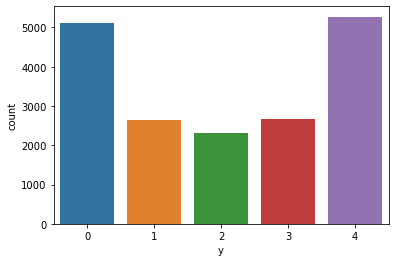

In [60]:
sns.countplot('y',data=dataset)#checking distribution of output data

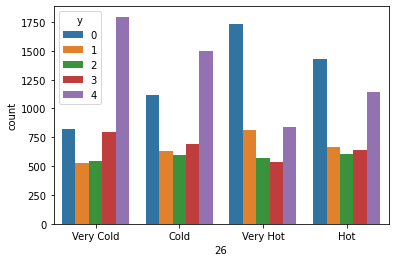

In [61]:
sns.countplot('26',data=dataset,hue='y')# checking count of very cold, Cold, Very hot, Hot for each output class

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1,

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000AC1103FD0>,
      dtype=object)

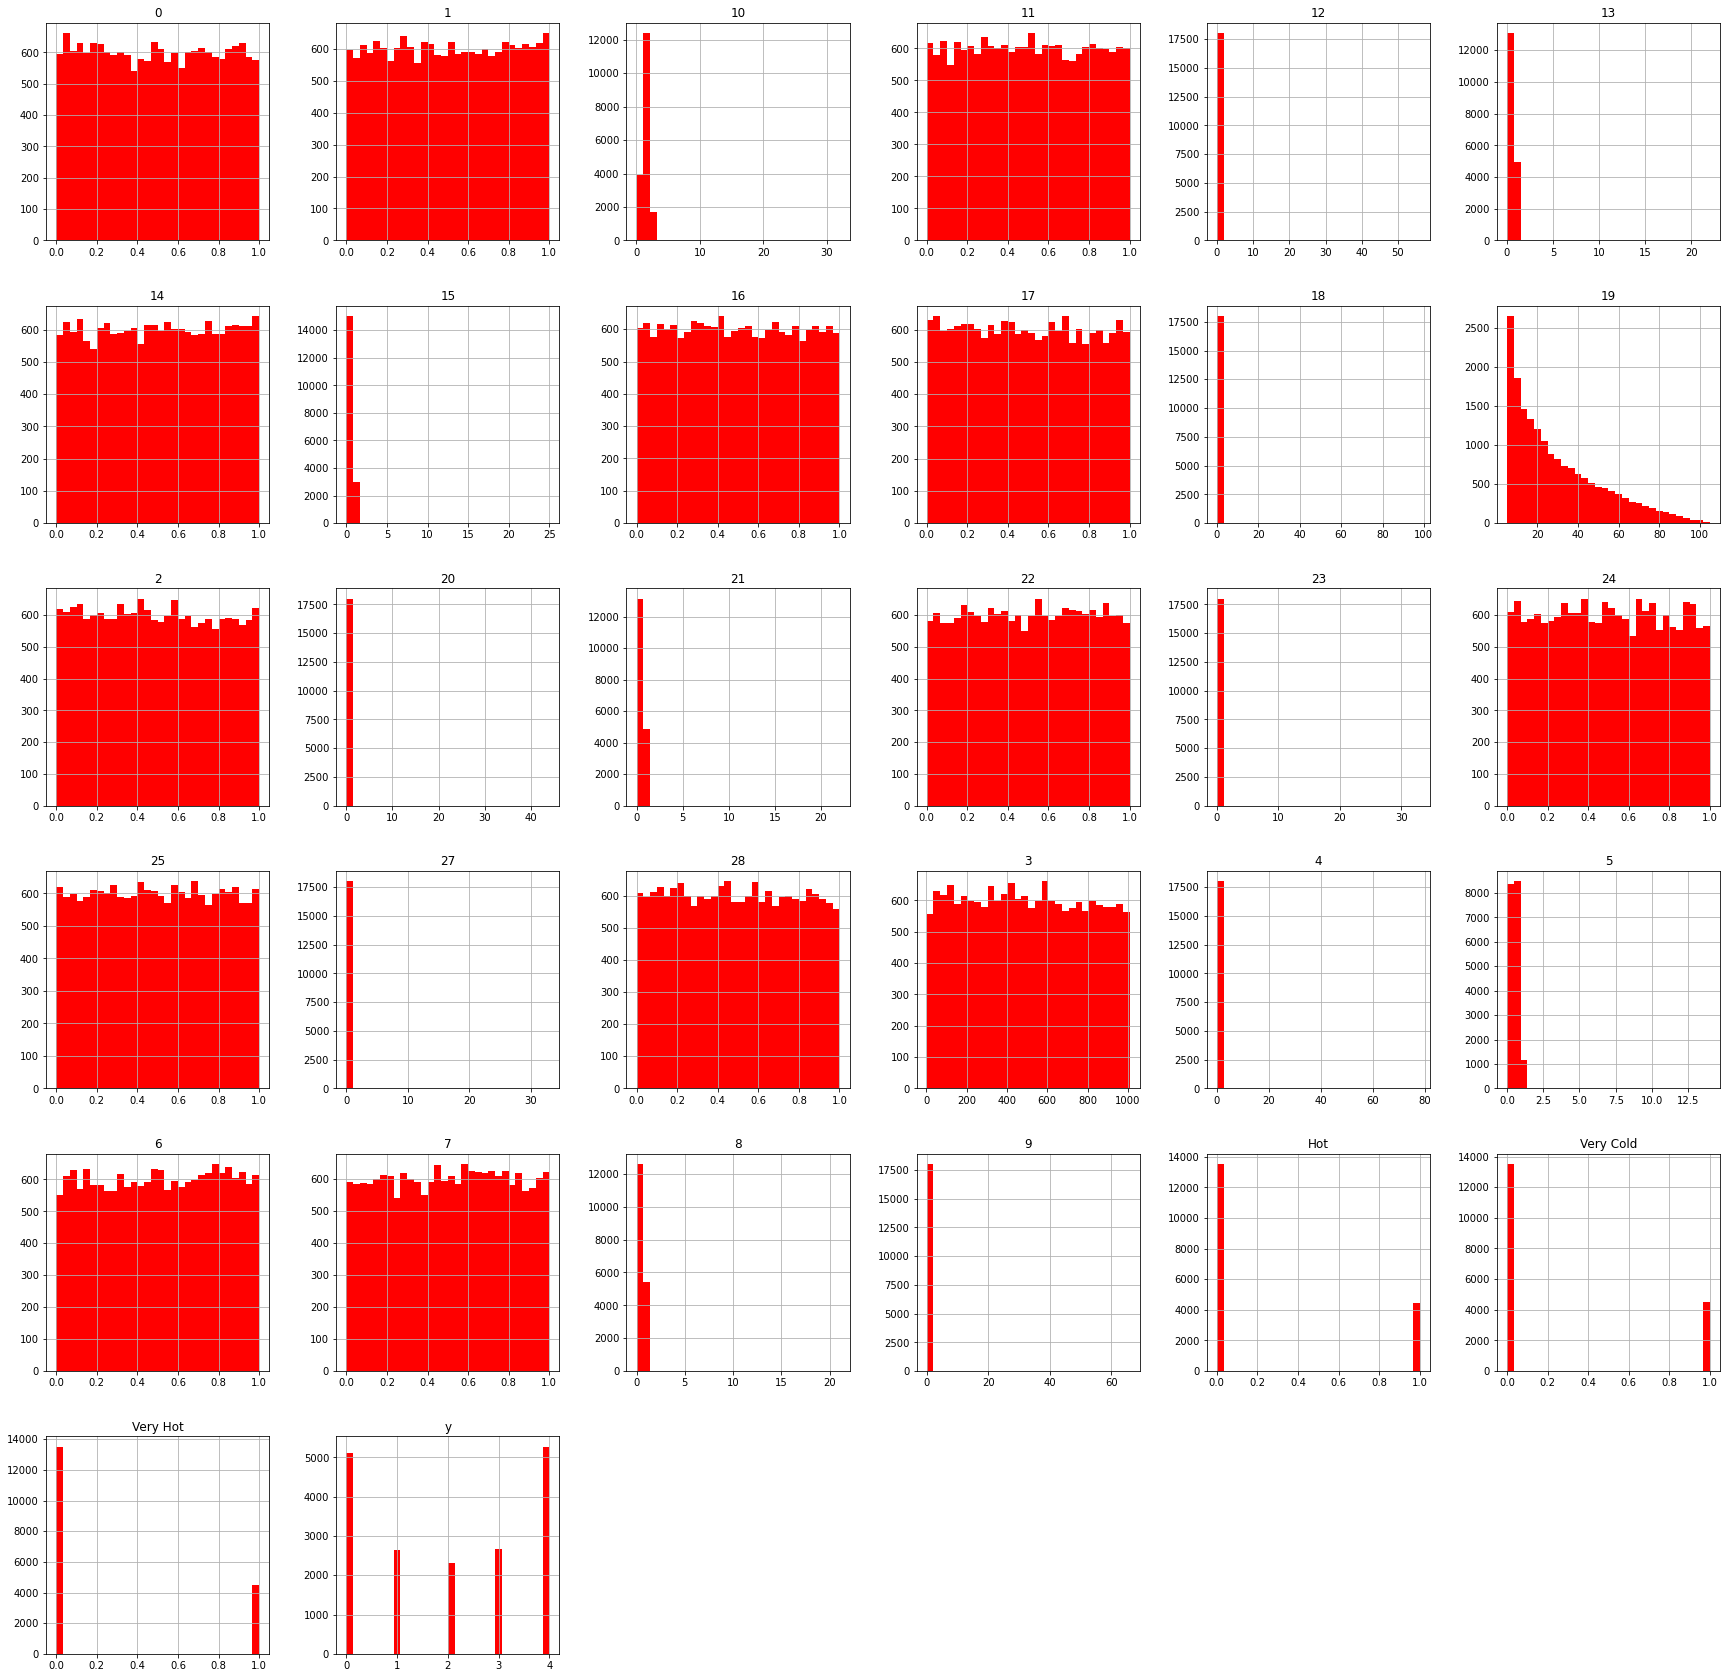

In [62]:
dataset.hist(bins=30,color='red',figsize=(30,30))# checking the distribution of data for the entire dataset please scroll down
                                                    # to check the distribution

In [24]:
corelation=dataset.corr()

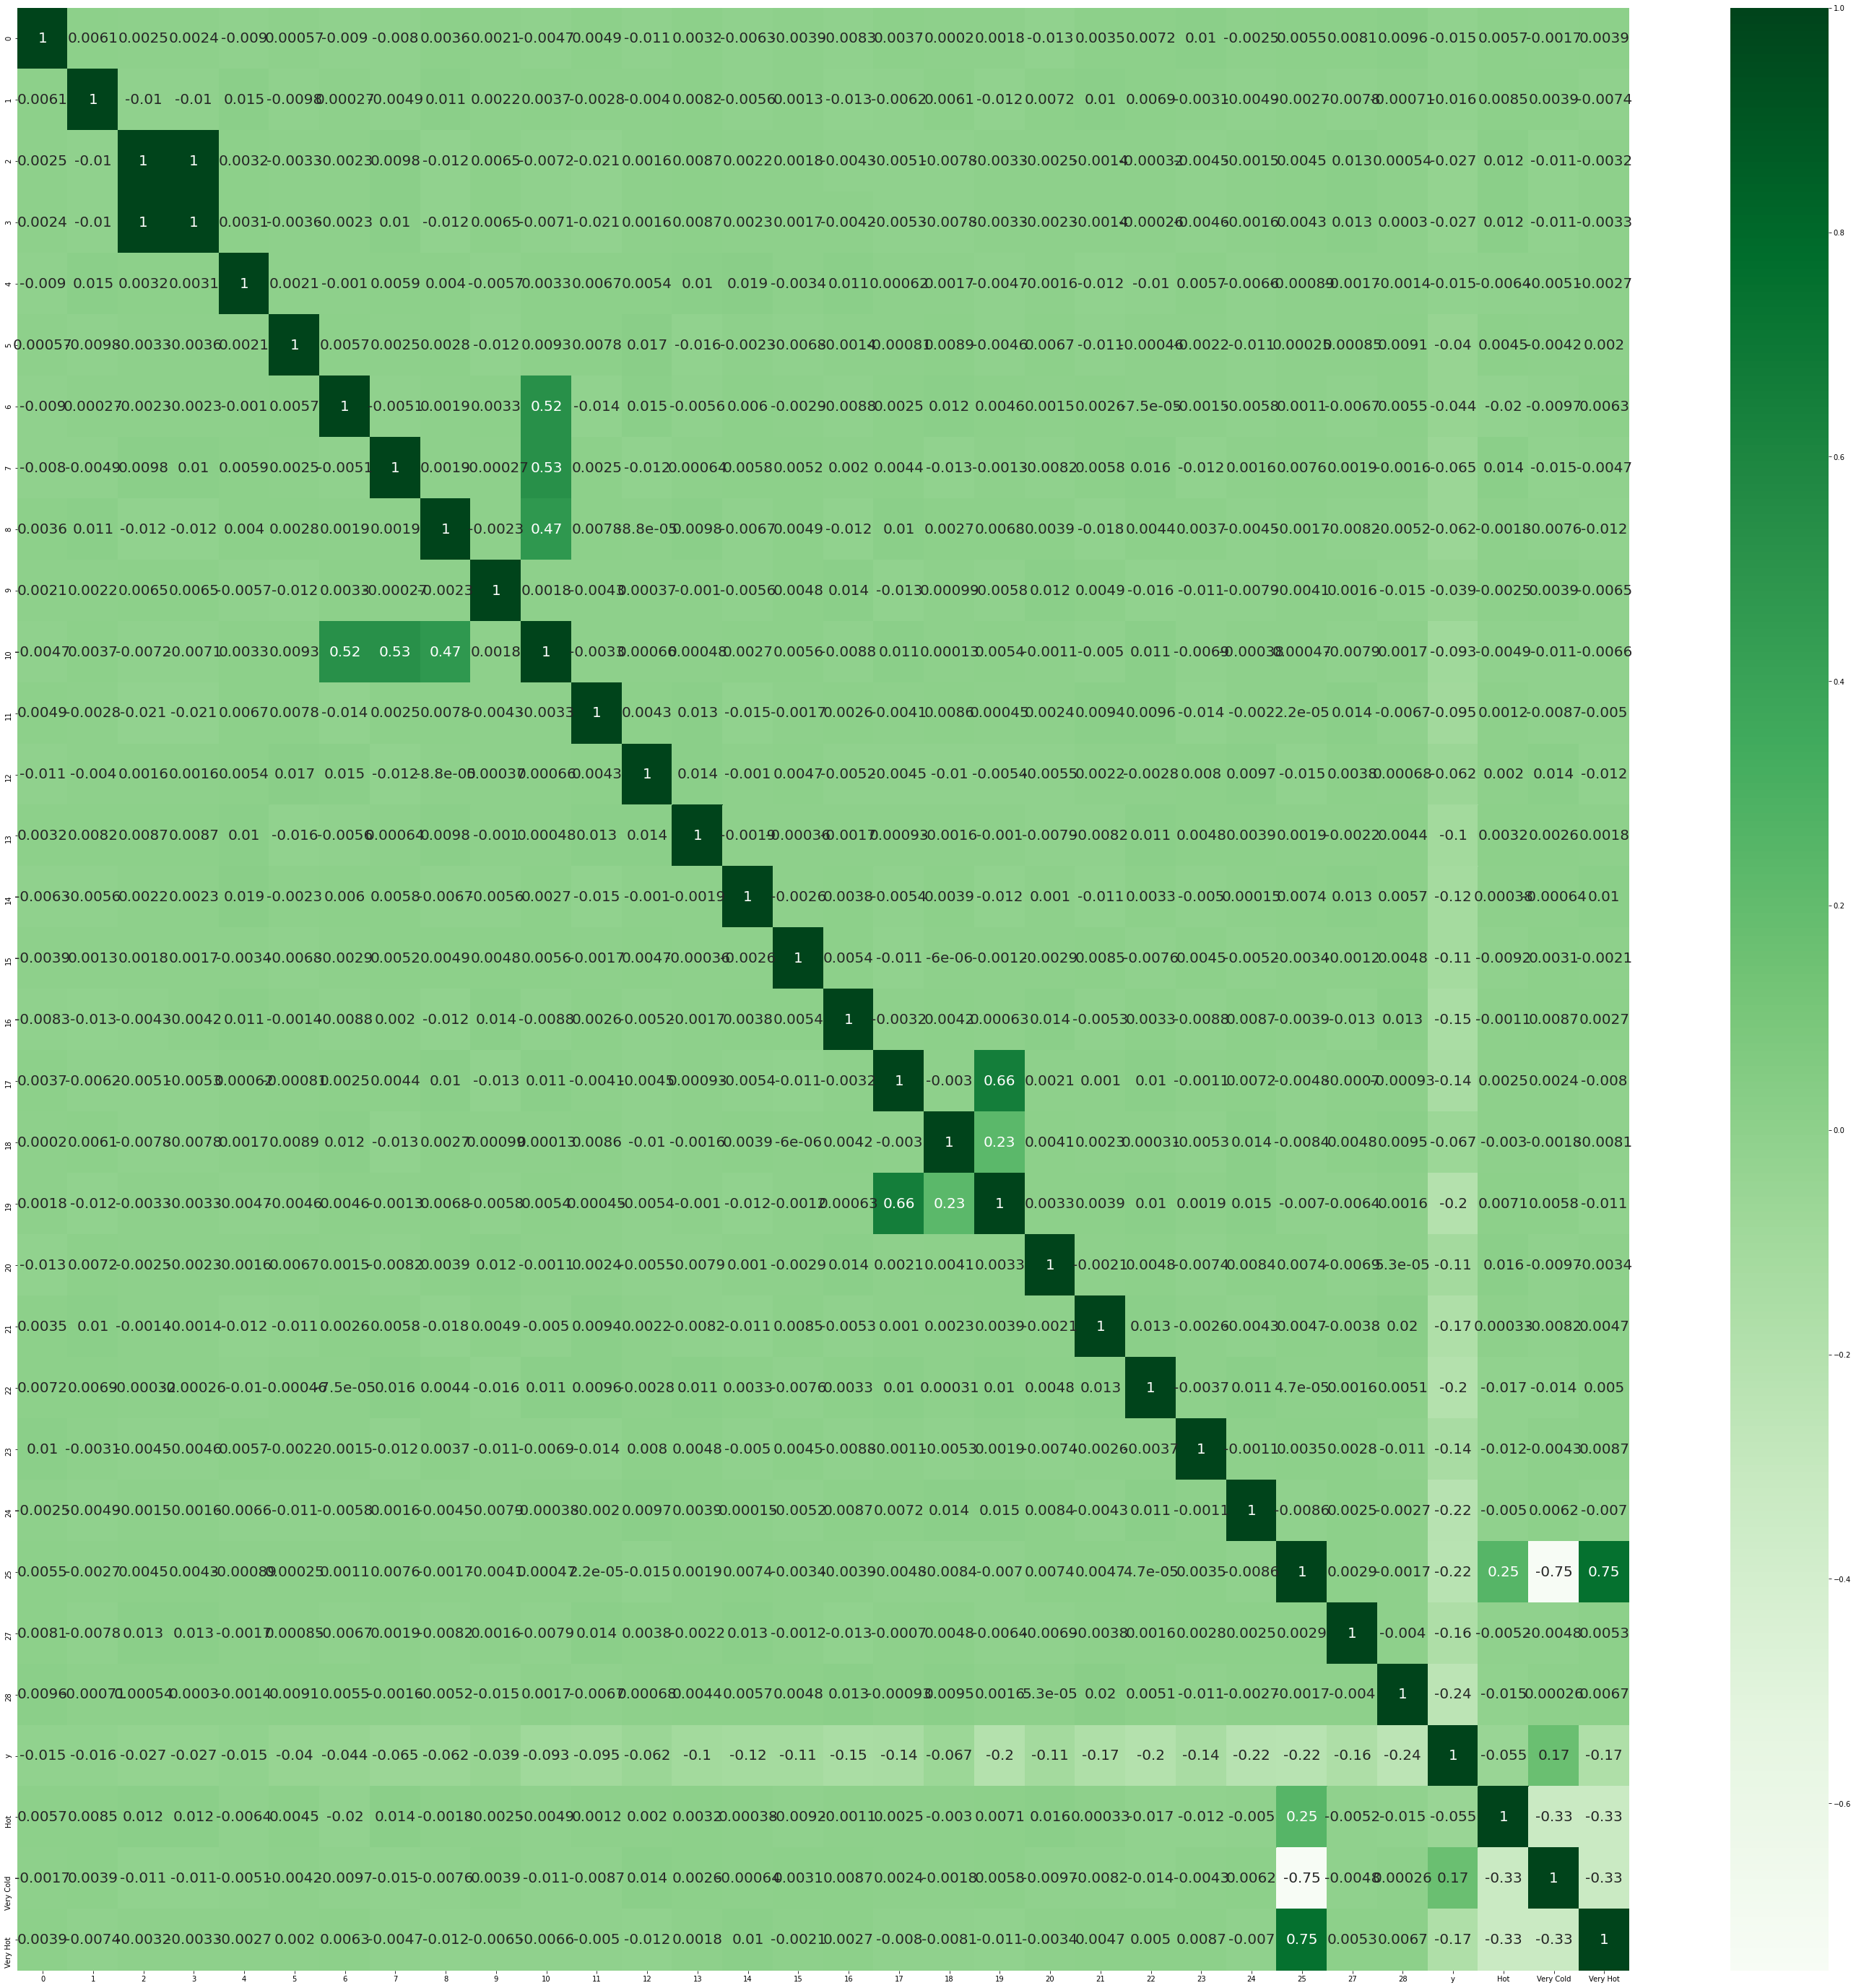

In [25]:
plt.figure(figsize=(50,50))
sns.heatmap(corelation,annot=True,annot_kws={'size': 20},cmap="Greens")# to see the correlation between different features

In [11]:
def find_corelation(dataset,threshold):# checking for highly corelated columns
    cor =set()#to get identical columns
    a=[]
    corelation=dataset.corr()
    for i in range(len(corelation.columns)):
        for j in range(i):
            if abs(corelation.iloc[i,j])>threshold:
                cname=corelation.columns[i]
                cor.add(cname)
               
    return cor

In [12]:
cor_features=find_corelation(dataset,0.85)

In [13]:
cor_features

{'3'}

In [28]:
#we can see that column 3 is highly corelated with column 2 se we can remove either of the column as both of the columns are mostly 
#containing same data

In [7]:
dataset.drop('3',axis=1,inplace=True)

In [8]:
dataset.head()

,0,1,2,4,5,6,7,8,9,10,...,20,21,22,23,24,25,26,27,28,y
0,0.154163,0.740050,0.263315,0.533739,0.014575,0.918747,0.900715,0.033421,0.956949,1.852883,...,0.485377,0.768134,0.160717,0.764560,0.020810,0.135210,Very Cold,0.116273,0.309898,4
1,0.671453,0.471230,0.816168,0.289587,0.733126,0.702622,0.327569,0.334648,0.978058,1.364839,...,0.177564,0.962597,0.419250,0.424052,0.463149,0.373723,Cold,0.465508,0.035168,1
2,0.084273,0.732521,0.636200,0.027908,0.300170,0.220853,0.055020,0.523246,0.416370,0.799119,...,0.461440,0.894743,0.605778,0.603356,0.443872,0.480047,Cold,0.888448,0.208500,2
3,0.944581,0.073470,0.595152,0.031151,0.665257,0.637385,0.862465,0.941638,0.445627,2.441488,...,0.946556,0.857191,0.688928,0.003288,0.900103,0.919865,Very Hot,0.005909,0.642926,0
4,0.385217,0.595742,0.610807,0.599619,0.312284,0.069874,0.800734,0.911434,0.194675,1.782042,...,0.333832,0.778473,0.135435,0.191711,0.402589,0.786844,Cold,0.253808,0.109485,4


In [9]:
input_data=dataset.drop(['26','y'],axis=1)

In [10]:
input_data.head()

,0,1,2,4,5,6,7,8,9,10,...,18,19,20,21,22,23,24,25,27,28
0,0.154163,0.740050,0.263315,0.533739,0.014575,0.918747,0.900715,0.033421,0.956949,1.852883,...,0.552038,33.773638,0.485377,0.768134,0.160717,0.764560,0.020810,0.135210,0.116273,0.309898
1,0.671453,0.471230,0.816168,0.289587,0.733126,0.702622,0.327569,0.334648,0.978058,1.364839,...,0.995138,44.868382,0.177564,0.962597,0.419250,0.424052,0.463149,0.373723,0.465508,0.035168
2,0.084273,0.732521,0.636200,0.027908,0.300170,0.220853,0.055020,0.523246,0.416370,0.799119,...,0.506556,29.959908,0.461440,0.894743,0.605778,0.603356,0.443872,0.480047,0.888448,0.208500
3,0.944581,0.073470,0.595152,0.031151,0.665257,0.637385,0.862465,0.941638,0.445627,2.441488,...,0.405958,43.867159,0.946556,0.857191,0.688928,0.003288,0.900103,0.919865,0.005909,0.642926
4,0.385217,0.595742,0.610807,0.599619,0.312284,0.069874,0.800734,0.911434,0.194675,1.782042,...,0.511643,38.152374,0.333832,0.778473,0.135435,0.191711,0.402589,0.786844,0.253808,0.109485


In [11]:
output_dataset=dataset['y']

In [12]:
output_dataset.head()

0    4
1    1
2    2
3    0
4    4
Name: y, dtype: int64

In [13]:
dataset.head()

,0,1,2,4,5,6,7,8,9,10,...,20,21,22,23,24,25,26,27,28,y
0,0.154163,0.740050,0.263315,0.533739,0.014575,0.918747,0.900715,0.033421,0.956949,1.852883,...,0.485377,0.768134,0.160717,0.764560,0.020810,0.135210,Very Cold,0.116273,0.309898,4
1,0.671453,0.471230,0.816168,0.289587,0.733126,0.702622,0.327569,0.334648,0.978058,1.364839,...,0.177564,0.962597,0.419250,0.424052,0.463149,0.373723,Cold,0.465508,0.035168,1
2,0.084273,0.732521,0.636200,0.027908,0.300170,0.220853,0.055020,0.523246,0.416370,0.799119,...,0.461440,0.894743,0.605778,0.603356,0.443872,0.480047,Cold,0.888448,0.208500,2
3,0.944581,0.073470,0.595152,0.031151,0.665257,0.637385,0.862465,0.941638,0.445627,2.441488,...,0.946556,0.857191,0.688928,0.003288,0.900103,0.919865,Very Hot,0.005909,0.642926,0
4,0.385217,0.595742,0.610807,0.599619,0.312284,0.069874,0.800734,0.911434,0.194675,1.782042,...,0.333832,0.778473,0.135435,0.191711,0.402589,0.786844,Cold,0.253808,0.109485,4


In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [70]:
X = input_data
calc_vif(X)

,variables,VIF
0,0,3.806970
1,1,3.876736
2,2,3.794753
3,4,1.593832
4,5,3.582563
5,6,8.895320
6,7,8.943002
7,8,6.534612
8,9,1.760823
9,10,37.721250


In [15]:
input_data.drop(['25'],axis=1,inplace=True)# removed one highly corelated columns

In [16]:
output_dataset=dataset['y']

In [17]:
input_data

,0,1,2,4,5,6,7,8,9,10,...,17,18,19,20,21,22,23,24,27,28
0,0.154163,0.740050,0.263315,0.533739,0.014575,0.918747,0.900715,0.033421,0.956949,1.852883,...,0.521226,0.552038,33.773638,0.485377,0.768134,0.160717,0.764560,0.020810,0.116273,0.309898
1,0.671453,0.471230,0.816168,0.289587,0.733126,0.702622,0.327569,0.334648,0.978058,1.364839,...,0.400632,0.995138,44.868382,0.177564,0.962597,0.419250,0.424052,0.463149,0.465508,0.035168
2,0.084273,0.732521,0.636200,0.027908,0.300170,0.220853,0.055020,0.523246,0.416370,0.799119,...,0.492737,0.506556,29.959908,0.461440,0.894743,0.605778,0.603356,0.443872,0.888448,0.208500
3,0.944581,0.073470,0.595152,0.031151,0.665257,0.637385,0.862465,0.941638,0.445627,2.441488,...,0.957417,0.405958,43.867159,0.946556,0.857191,0.688928,0.003288,0.900103,0.005909,0.642926
4,0.385217,0.595742,0.610807,0.599619,0.312284,0.069874,0.800734,0.911434,0.194675,1.782042,...,0.647959,0.511643,38.152374,0.333832,0.778473,0.135435,0.191711,0.402589,0.253808,0.109485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,0.457958,0.642367,0.525224,0.908973,0.041879,0.314760,0.502609,0.618821,0.473398,1.445966,...,0.205198,0.373453,12.663173,0.116284,0.127008,0.853264,0.204691,0.824045,0.242143,0.718839
17996,0.398603,0.576079,0.079975,0.478481,0.843795,0.256441,0.849709,0.620136,0.251116,1.726286,...,0.838299,0.739399,66.983756,0.093917,0.185403,0.808505,0.095233,0.776949,0.946554,0.150952
17997,0.455671,0.098704,0.417840,0.302754,0.591551,0.470392,0.748002,0.746729,0.744290,1.965123,...,0.247128,0.153534,8.794238,0.745924,0.440073,0.682202,0.209295,0.832271,0.099026,0.746490
17998,0.052394,0.896098,0.731967,11.000000,0.314701,0.423992,0.246733,0.446040,0.296398,1.116766,...,0.753909,0.930610,75.159494,0.832404,0.273394,0.293221,0.898085,0.427504,0.212691,0.293841


In [18]:
output_dataset.value_counts()

4    5274
0    5104
3    2661
1    2639
2    2322
Name: y, dtype: int64

In [19]:
#Now trying to convert the imbalance dataset to balance dataset using over sampling technique where for all the output classes will have same number of samples
# should be present for effective traning of the model

In [20]:
from imblearn.over_sampling import RandomOverSampler

In [21]:
rds=RandomOverSampler()

In [22]:
final_dataset,output_dataset = rds.fit_resample(input_data,output_dataset)

In [23]:
final_dataset.shape,output_dataset.shape

((26370, 26), (26370,))

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test =train_test_split(final_dataset,output_dataset,test_size=.15,random_state=0)

In [26]:
x_train.head()

,0,1,2,4,5,6,7,8,9,10,...,17,18,19,20,21,22,23,24,27,28
12315,0.653714,0.474930,0.344538,0.891904,0.042300,0.074438,0.794673,0.974569,0.518813,1.843681,...,0.728023,0.570195,46.511546,0.286039,0.438714,0.465180,0.007695,0.279267,0.526052,0.216430
26299,0.871655,0.549805,0.908019,0.388870,0.521645,0.318250,0.364338,0.776552,0.293165,1.459140,...,0.985251,0.598080,63.925845,0.268887,0.195175,0.036895,0.714374,0.060946,0.388992,0.400963
22266,0.654042,0.122803,0.943296,0.804152,0.501393,0.489008,0.699486,0.848876,0.440388,2.037371,...,0.300667,0.979580,34.452715,0.631671,0.031000,0.391899,0.620601,0.253466,0.691663,0.036716
23098,0.046769,0.865123,0.493671,0.756464,0.172512,0.007821,0.829852,0.989415,0.560946,1.827089,...,0.769664,0.837944,69.493484,0.513736,0.288283,0.923390,0.978177,0.011350,0.935555,0.524506
19033,0.802294,0.484658,0.177877,0.176950,0.734153,0.951884,0.883191,0.726266,0.476820,2.561341,...,0.095796,0.474184,9.542490,0.655532,0.281355,0.933068,0.386565,0.931687,0.374936,0.441527


In [27]:
y_train.head()

12315    1
26299    3
22266    2
23098    2
19033    1
Name: y, dtype: int64

In [99]:
#from sklearn.feature_selection import VarianceThreshold

In [106]:
#var_thes = VarianceThreshold(threshold=0.1)

In [107]:
#var_thes.fit(x_train) 

VarianceThreshold(threshold=0.1)

In [108]:
#sum(var_thes.get_support())

14

In [109]:
#const_columns=[c for c in x_train.columns if c not in x_train.columns[var_thes.get_support()]]

In [110]:
#len(const_columns)

15

In [111]:
#x_train.drop(const_columns,axis=1,inplace=True)

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [112]:
x_train.head()

,4,8,9,10,12,13,15,18,19,20,21,Hot,Very Cold,Very Hot
12315,0.891904,0.974569,0.518813,1.843681,0.752921,0.988641,0.544377,0.570195,46.511546,0.286039,0.438714,1,0,0
26299,0.307178,0.784726,0.613112,1.811644,0.165467,0.566214,0.724390,0.461738,31.933737,0.198815,0.913038,0,0,1
22266,0.699737,0.015150,0.734445,0.832568,0.660798,0.399620,0.816592,0.869514,90.897155,0.287939,0.876728,0,1,0
23098,0.804922,0.352659,0.972157,0.929514,0.313599,0.645124,0.663886,0.302310,18.964813,0.033569,0.806447,0,1,0
19033,0.149641,0.817161,0.852570,2.095231,0.265426,0.286140,0.610806,0.790487,11.450431,0.093947,0.468849,0,0,1


In [113]:
#x_test.drop(const_columns,axis=1,inplace=True)

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [114]:
x_test.head()

,4,8,9,10,12,13,15,18,19,20,21,Hot,Very Cold,Very Hot
13351,0.948722,0.557419,0.360662,1.568863,0.634503,0.178341,0.518863,0.039883,6.027398,0.477173,0.950457,0,0,1
591,0.250212,0.797092,0.987820,2.533055,0.527638,0.954125,0.382272,0.644875,9.106087,0.630960,0.903460,0,0,1
15064,0.619508,0.394624,0.881183,1.311369,0.669090,0.525450,0.667710,0.948236,84.002607,0.936651,0.813783,0,1,0
8960,0.081153,0.712602,0.055781,2.000680,0.368953,0.836423,0.113847,0.154094,18.691143,0.348500,0.988938,0,0,1
20689,0.371122,0.651273,0.934440,2.046499,0.367589,0.798397,0.708571,0.597076,35.619233,0.800415,0.197162,0,0,0


In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
scaler = StandardScaler()

In [38]:

dataset.drop('26',axis=1,inplace=True)

In [39]:
scaled_input_dataset=scaler.fit_transform(x_train)

In [40]:
scaled_output_dataset = scaler.fit_transform(x_test)

In [41]:
final_train_dataset=pd.DataFrame(scaled_input_dataset)

In [42]:
final_test_dataset=pd.DataFrame(scaled_output_dataset)

In [43]:
final_train_dataset.columns=x_train.columns

In [44]:
final_test_dataset.columns= x_test.columns

In [45]:
final_train_dataset.head()

,0,1,2,4,5,6,7,8,9,10,...,20,21,22,23,24,27,28,Hot,Very Cold,Very Hot
0,0.540897,-0.099861,-0.510647,0.485673,-1.521946,-1.486952,1.015821,1.485960,0.021313,0.629970,...,-0.524477,-0.196371,-0.131365,-1.700048,-0.773185,0.081750,-0.966961,1.736493,-0.571683,-0.573675
1,-0.357391,1.016868,-1.212521,0.592241,1.386378,0.933762,0.278528,1.440023,0.406200,1.512406,...,-0.498270,0.583234,-0.492813,-0.600861,-0.828943,-1.460513,1.240146,-0.575873,1.749220,-0.573675
2,-0.147887,0.182265,0.997899,-0.420266,0.594273,-1.580560,0.306318,0.285666,0.056412,-0.518306,...,0.165011,0.303848,-0.844868,0.429832,0.545874,1.177917,-1.316740,-0.575873,-0.571683,1.743146
3,-0.939561,0.562374,-1.659926,-0.408959,-1.552665,-0.729380,0.044385,1.154649,0.074998,0.319056,...,0.017463,-0.591282,0.704127,0.435275,-1.111099,-0.557370,1.301900,1.736493,-0.571683,-0.573675
4,-0.969343,-0.689163,1.430531,-0.161964,-0.984857,-0.324563,0.579148,0.490414,-0.487101,0.428044,...,0.061401,0.397803,-1.217592,0.810716,-0.513305,1.467987,0.450678,1.736493,-0.571683,-0.573675


In [46]:
final_test_dataset.head()

,0,1,2,4,5,6,7,8,9,10,...,20,21,22,23,24,27,28,Hot,Very Cold,Very Hot
0,0.171529,1.411800,-0.385358,1.606411,1.181577,-0.470473,0.477703,0.189268,-0.474371,0.113556,...,-0.084034,1.532340,0.927304,-0.041472,-0.717693,0.749140,1.736079,-0.58708,-0.576572,1.739085
1,0.216575,0.037542,-1.595410,-0.872950,1.653514,0.817983,1.692593,1.022231,1.708587,2.037623,...,0.454590,1.369875,0.486039,0.421599,-0.973493,-0.167324,-0.774657,-0.58708,-0.576572,1.739085
2,-0.042270,1.552040,0.259129,0.437865,1.662072,-0.766922,0.446504,-0.376511,1.337415,-0.400279,...,1.525239,1.059870,0.087561,0.617086,-1.340992,0.275635,0.023667,-0.58708,1.734389,-0.575015
3,-0.204388,-1.605754,-1.692858,-1.473025,-1.350048,-0.275176,1.237193,0.728594,-1.535577,0.975257,...,-0.534696,1.665365,-0.554566,0.245489,-0.587204,-0.422431,-0.797882,-0.58708,-0.576572,1.739085
4,0.568412,0.312479,0.379085,1.179692,-0.159209,0.309708,0.340618,0.717464,-1.587591,0.787348,...,1.679179,-0.987178,0.036747,-0.621827,1.518600,0.829710,1.117010,-0.58708,-0.576572,-0.575015


In [68]:
final_train_dataset.shape,y_train.shape

((22414, 29), (22414,))

In [48]:
final_test_dataset.shape,y_test.shape

((3956, 29), (3956,))

In [49]:
y_train.shape

(22414,)

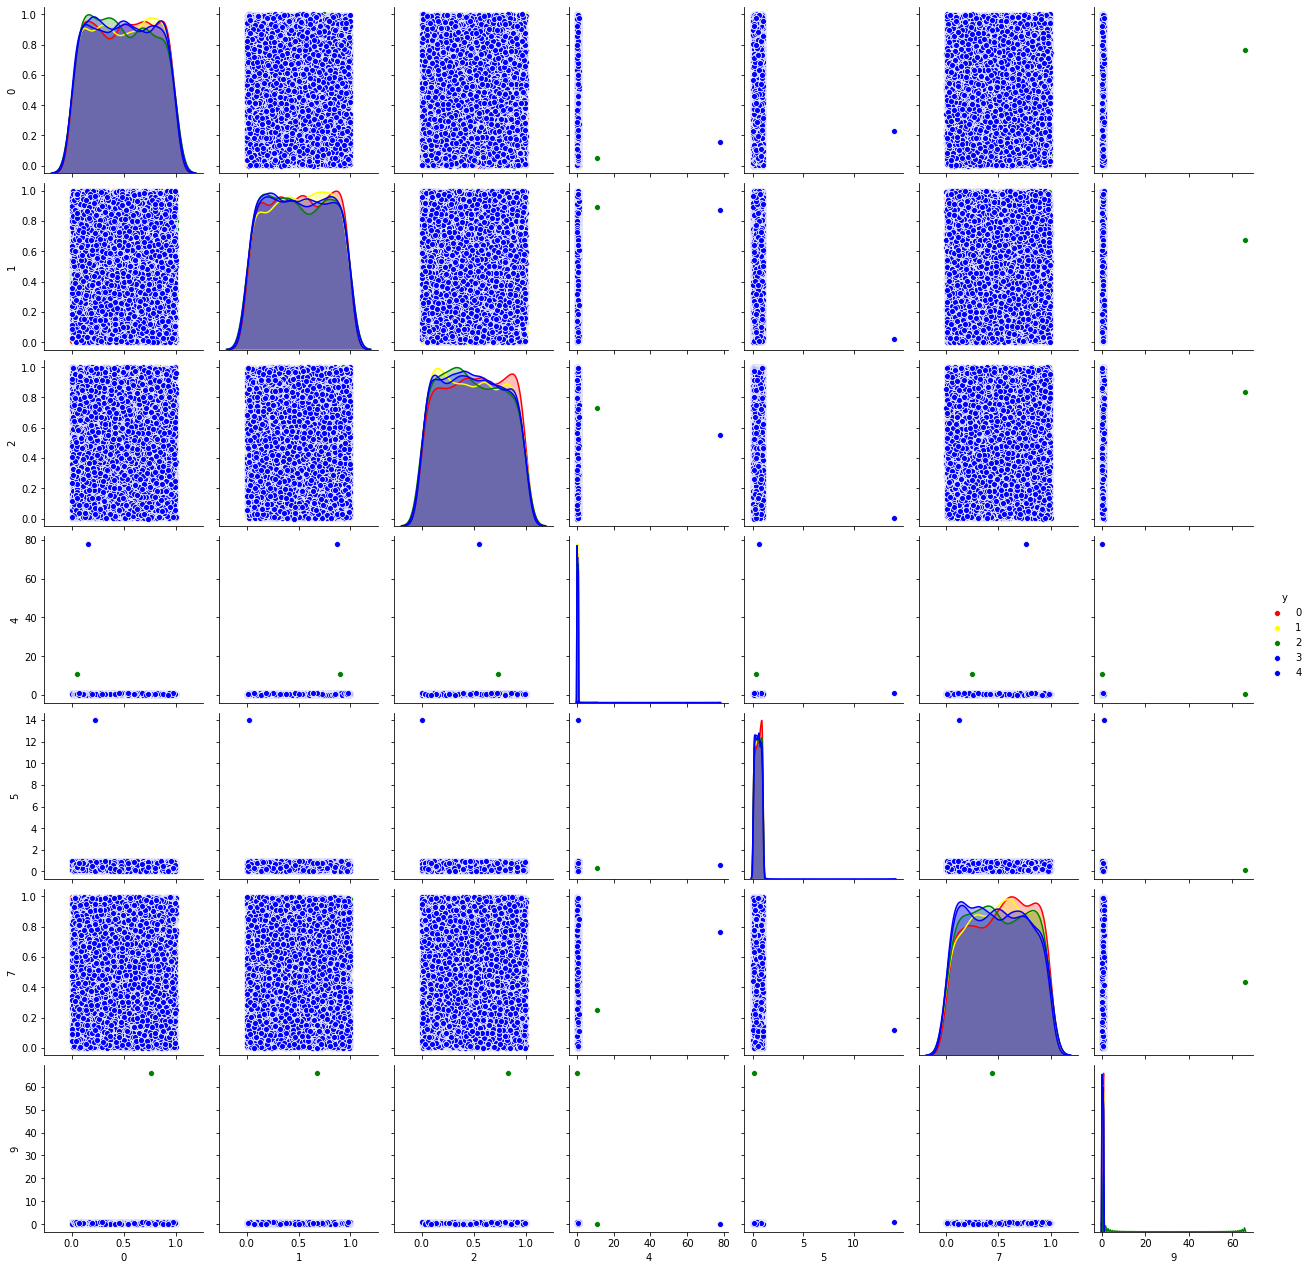

In [119]:
# now choosing few columns to check the data distribution with respect to the output class to find out the suitable Machine Learning 
# for the current dataset using pairplot
sns.pairplot(data=dataset[['0','1','2','4','5','7','9','y']],hue='y',palette=['red','yellow','green','blue','blue'])

In [53]:
# seems like the data distribution is highly overlapping so preferably KNeighbors, Random Forest Classification, SVM can be use 


In [50]:
from sklearn.neighbors import KNeighborsClassifier


In [396]:
k=range(1,50)# trying to find out which is the approprite n_neighbors value
acc ={}
a=[]
for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(final_train_dataset,y_train)
    knny_pred = knn.predict(final_test_dataset)
    acc[i]=metrics.accuracy_score(y_test,knny_pred)
    a.append(metrics.accuracy_score(y_test,knny_pred))

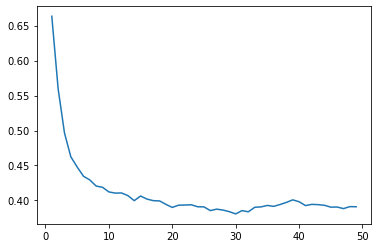

In [397]:
plt.plot(k,a)

In [398]:
acc

{1: 0.6634433067880167,
 2: 0.5597269624573379,
 3: 0.49658703071672355,
 4: 0.46245733788395904,
 5: 0.4478574137277209,
 6: 0.43458475540386804,
 7: 0.42927569207432686,
 8: 0.4205536594615093,
 9: 0.41884717481987105,
 10: 0.41221084565794464,
 11: 0.4105043610163064,
 12: 0.41069397042093286,
 13: 0.4069017823284035,
 14: 0.39969662495259767,
 15: 0.4063329541145241,
 16: 0.4019719378081153,
 17: 0.39969662495259767,
 18: 0.3993174061433447,
 19: 0.3943875616230565,
 20: 0.3900265453166477,
 21: 0.3932499051952977,
 22: 0.39343951459992416,
 23: 0.3938187334091771,
 24: 0.39097459233978005,
 25: 0.39078498293515357,
 26: 0.38547591960561245,
 27: 0.3875616230565036,
 28: 0.3862343572241183,
 29: 0.3839590443686007,
 30: 0.3807356844899507,
 31: 0.38547591960561245,
 32: 0.3837694349639742,
 33: 0.3902161547212742,
 34: 0.39078498293515357,
 35: 0.3928706863860447,
 36: 0.3915434205536595,
 37: 0.39419795221843,
 38: 0.39723170269245356,
 39: 0.4008342813803565,
 40: 0.3981797497155

In [51]:
knn = KNeighborsClassifier(n_neighbors=1)

In [52]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [53]:
knn_pred=knn.predict(x_test)

In [54]:
metrics.accuracy_score(y_test,knn_pred)

0.6653185035389282

In [56]:
cm = metrics.confusion_matrix(y_test,knn_pred)

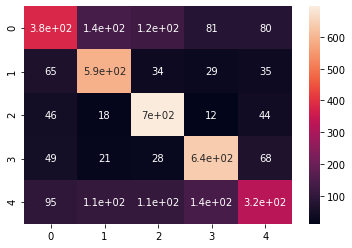

In [57]:
sns.heatmap(cm,annot=True)

In [ ]:
#hence the most accuracy using KNeighborsclassifier is near to 68 when n_neibours is equal to 1 though hyper parameter tuning can
# be done to improve the accuracy of the but I will try to test the model with RandomForestClassifier to check what is the 
# accuracy 

In [28]:
from sklearn.ensemble import RandomForestClassifier

# n_estimators
rfc = RandomForestClassifier()# no of random tree=100 and it will sum up to give a decision 



In [ ]:
# In RandomForestclassifier I took the train data from the train_test_split not the scaled data from standered scaler because 
# randomforest breaks the dataset into various branches and so it is not affected by outliers 
# and have low bais and low varience because it creates multiple  decision trees.

In [67]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [68]:
rfc.score(x_test,y_test)#in first attempt got a score near to 84% which is better than the score of the knn in first attempt

0.8425176946410515

In [70]:
random_pred=rfc.predict(x_test)

In [71]:
metrics.accuracy_score(y_test,random_pred)

0.8425176946410515

In [72]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       807
           1       0.90      0.79      0.85       756
           2       0.95      0.85      0.89       816
           3       0.91      0.78      0.84       804
           4       0.74      0.88      0.81       773

    accuracy                           0.84      3956
   macro avg       0.85      0.84      0.84      3956
weighted avg       0.85      0.84      0.84      3956



In [73]:
cm = metrics.confusion_matrix(y_test,random_pred)

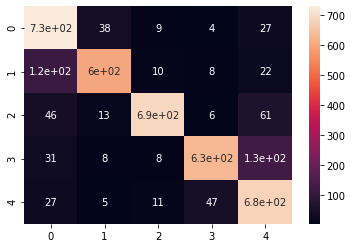

In [74]:
sns.heatmap(cm,annot=True)

In [ ]:
# Now trying hyperparameter tuning the random forest model

In [75]:
from sklearn.model_selection import KFold,StratifiedKFold# trying to use various crossvalidation process
kf = KFold(3)
skf= StratifiedKFold(10)
rfc = RandomForestClassifier()

In [47]:
from sklearn.model_selection import RandomizedSearchCV # trying to enhance the accuracy of the model by hyperparameter tuning

param_grid = { 'min_samples_leaf':[1,2,3,4,5,6,8],'min_samples_split':[1,3,4,5,7,9],'criterion':['gini', 'entropy'], 'bootstrap': [True,False], 'max_depth': list(np.linspace(10,1000,10,dtype=int)), 'max_features': ['auto', 'log2','sqrt'], 'n_estimators': list(np.linspace(200,2000,10,dtype=int))}

In [48]:
param_grid

{'min_samples_leaf': [1, 2, 3, 4, 5, 6, 8],
 'min_samples_split': [1, 3, 4, 5, 7, 9],
 'criterion': ['gini', 'entropy'],
 'bootstrap': [True, False],
 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000],
 'max_features': ['auto', 'log2', 'sqrt'],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [50]:
random = RandomizedSearchCV(estimator = rfc, param_distributions = param_grid, 

                          cv = kf, n_jobs = 1, verbose = 2,n_iter=30)

In [51]:
random.fit(x_train,y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] END bootstrap=False, criterion=entropy, max_depth=1000, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=600; total time= 2.0min
[CV] END bootstrap=False, criterion=entropy, max_depth=1000, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=600; total time= 2.0min
[CV] END bootstrap=False, criterion=entropy, max_depth=1000, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=600; total time= 1.9min
[CV] END bootstrap=False, criterion=gini, max_depth=230, max_features=log2, min_samples_leaf=3, min_samples_split=9, n_estimators=400; total time=  29.9s
[CV] END bootstrap=False, criterion=gini, max_depth=230, max_features=log2, min_samples_leaf=3, min_samples_split=9, n_estimators=400; total time=  30.0s
[CV] END bootstrap=False, criterion=gini, max_depth=230, max_features=log2, min_samples_leaf=3, min_samples_split=9, n_estimators=400; total time=  31.4s
[CV

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\_forest.py", line 393, in fit
    for i, t in enumerate(trees))
  File "c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "c:\users\hp\appdata\local\programs\python

[CV] END bootstrap=False, criterion=gini, max_depth=120, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=1600; total time=   0.6s


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\_forest.py", line 393, in fit
    for i, t in enumerate(trees))
  File "c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "c:\users\hp\appdata\local\programs\python

[CV] END bootstrap=False, criterion=gini, max_depth=120, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=1600; total time=   0.7s


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\_forest.py", line 393, in fit
    for i, t in enumerate(trees))
  File "c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "c:\users\hp\appdata\local\programs\python

[CV] END bootstrap=False, criterion=gini, max_depth=120, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=1600; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_depth=1000, max_features=log2, min_samples_leaf=6, min_samples_split=3, n_estimators=1800; total time= 1.4min
[CV] END bootstrap=True, criterion=gini, max_depth=1000, max_features=log2, min_samples_leaf=6, min_samples_split=3, n_estimators=1800; total time= 1.4min
[CV] END bootstrap=True, criterion=gini, max_depth=1000, max_features=log2, min_samples_leaf=6, min_samples_split=3, n_estimators=1800; total time= 1.4min
[CV] END bootstrap=True, criterion=entropy, max_depth=120, max_features=sqrt, min_samples_leaf=6, min_samples_split=9, n_estimators=600; total time= 1.3min
[CV] END bootstrap=True, criterion=entropy, max_depth=120, max_features=sqrt, min_samples_leaf=6, min_samples_split=9, n_estimators=600; total time= 1.3min
[CV] END bootstrap=True, criterion=entropy, max_depth=120, max_featu

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\_forest.py", line 393, in fit
    for i, t in enumerate(trees))
  File "c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "c:\users\hp\appdata\local\programs\python

[CV] END bootstrap=False, criterion=gini, max_depth=560, max_features=auto, min_samples_leaf=4, min_samples_split=1, n_estimators=1400; total time=   0.5s


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\_forest.py", line 393, in fit
    for i, t in enumerate(trees))
  File "c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "c:\users\hp\appdata\local\programs\python

[CV] END bootstrap=False, criterion=gini, max_depth=560, max_features=auto, min_samples_leaf=4, min_samples_split=1, n_estimators=1400; total time=   0.5s


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\_forest.py", line 393, in fit
    for i, t in enumerate(trees))
  File "c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "c:\users\hp\appdata\local\programs\python

[CV] END bootstrap=False, criterion=gini, max_depth=560, max_features=auto, min_samples_leaf=4, min_samples_split=1, n_estimators=1400; total time=   0.5s
[CV] END bootstrap=True, criterion=gini, max_depth=1000, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=  54.1s
[CV] END bootstrap=True, criterion=gini, max_depth=1000, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=  55.0s
[CV] END bootstrap=True, criterion=gini, max_depth=1000, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=  54.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=1600; total time= 3.1min
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=1600; total time= 3.1min
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_featur

[CV] END bootstrap=False, criterion=gini, max_depth=450, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=1600; total time= 2.0min
[CV] END bootstrap=False, criterion=gini, max_depth=450, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=1600; total time= 2.0min


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\_forest.py", line 393, in fit
    for i, t in enumerate(trees))
  File "c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "c:\users\hp\appdata\local\programs\python

[CV] END bootstrap=True, criterion=gini, max_depth=780, max_features=sqrt, min_samples_leaf=5, min_samples_split=1, n_estimators=1600; total time=   0.6s


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\_forest.py", line 393, in fit
    for i, t in enumerate(trees))
  File "c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "c:\users\hp\appdata\local\programs\python

[CV] END bootstrap=True, criterion=gini, max_depth=780, max_features=sqrt, min_samples_leaf=5, min_samples_split=1, n_estimators=1600; total time=   0.6s


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\_forest.py", line 393, in fit
    for i, t in enumerate(trees))
  File "c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "c:\users\hp\appdata\local\programs\python

[CV] END bootstrap=True, criterion=gini, max_depth=780, max_features=sqrt, min_samples_leaf=5, min_samples_split=1, n_estimators=1600; total time=   0.6s


RandomizedSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
                   estimator=RandomForestClassifier(), n_iter=30, n_jobs=1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'log2',
                                                         'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             8],
                                        'min_samples_split': [1, 3, 4, 5, 7, 9],
                                        'n_estimators': [200, 400, 600, 800,
                                                     

In [52]:
random.best_params_# the best parameter predicted by RandomSearchCV

{'n_estimators': 2000,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 890,
 'criterion': 'gini',
 'bootstrap': True}

In [57]:
best_random_grid=random.best_estimator_

In [76]:
rfc = RandomForestClassifier(n_estimators=2000,min_samples_split=4,min_samples_leaf=1,max_features='log2',max_depth=890,criterion='gini',bootstrap=True)

In [78]:
rfc.fit(x_train,y_train)

RandomForestClassifier(max_depth=890, max_features='log2', min_samples_split=4,
                       n_estimators=2000)

In [79]:
random_cv_pred = rfc.predict(x_test)

In [81]:
metrics.accuracy_score(y_test,random_cv_pred)# from 85% accuracy it has increase to 86.52%

0.865267947421638

In [82]:
cm = metrics.confusion_matrix(y_test,random_cv_pred)

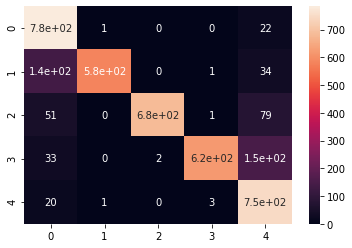

In [83]:
sns.heatmap(cm,annot=True)# we can see the true positives have increase from our previous model

In [80]:
print(metrics.classification_report(y_test,random_cv_pred))

              precision    recall  f1-score   support

           0       0.76      0.97      0.86       807
           1       1.00      0.77      0.87       756
           2       1.00      0.84      0.91       816
           3       0.99      0.77      0.87       804
           4       0.73      0.97      0.83       773

    accuracy                           0.87      3956
   macro avg       0.90      0.86      0.87      3956
weighted avg       0.90      0.87      0.87      3956



In [ ]:
random.best_estimator_

In [ ]:
# Now tring to further increase the model accuracy score by using randomsearchcv's best parameters inside gridsearchcv anolg with some
# other values

In [39]:

from sklearn.model_selection import GridSearchCV

In [40]:
param_grid={'n_estimators': [1800,1900,2000],
 'min_samples_split': [2,4,6],
 'min_samples_leaf': [1,3,5],
 'max_features': ['log2'],
 'max_depth': [890],
 'criterion': ['gini'],
 'bootstrap': [True]}

In [41]:
param_grid

{'n_estimators': [1800, 1900, 2000],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 3, 5],
 'max_features': ['log2'],
 'max_depth': [890],
 'criterion': ['gini'],
 'bootstrap': [True]}

In [44]:
rfc = RandomForestClassifier()
grid_cv=GridSearchCV(estimator=rfc,param_grid=param_grid,cv=5,n_jobs=1,verbose = 2)

In [45]:
grid_cv.fit(x_train,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END bootstrap=True, criterion=gini, max_depth=890, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1800; total time= 2.0min
[CV] END bootstrap=True, criterion=gini, max_depth=890, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1800; total time= 2.0min
[CV] END bootstrap=True, criterion=gini, max_depth=890, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1800; total time= 2.0min
[CV] END bootstrap=True, criterion=gini, max_depth=890, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1800; total time= 2.0min
[CV] END bootstrap=True, criterion=gini, max_depth=890, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1800; total time= 2.0min
[CV] END bootstrap=True, criterion=gini, max_depth=890, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1900; total time= 2.1min
[CV] END boots

[CV] END bootstrap=True, criterion=gini, max_depth=890, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=1900; total time= 1.9min
[CV] END bootstrap=True, criterion=gini, max_depth=890, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=1900; total time= 1.9min
[CV] END bootstrap=True, criterion=gini, max_depth=890, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=2000; total time= 2.0min
[CV] END bootstrap=True, criterion=gini, max_depth=890, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=2000; total time= 2.0min
[CV] END bootstrap=True, criterion=gini, max_depth=890, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=2000; total time= 2.0min
[CV] END bootstrap=True, criterion=gini, max_depth=890, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=2000; total time= 2.0min
[CV] END bootstrap=True, criterion=gini, max_depth=890, max_features=log2, m

[CV] END bootstrap=True, criterion=gini, max_depth=890, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=1800; total time= 1.9min
[CV] END bootstrap=True, criterion=gini, max_depth=890, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=1800; total time= 1.8min
[CV] END bootstrap=True, criterion=gini, max_depth=890, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=1800; total time= 1.8min
[CV] END bootstrap=True, criterion=gini, max_depth=890, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=1900; total time= 1.9min
[CV] END bootstrap=True, criterion=gini, max_depth=890, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=1900; total time= 2.0min
[CV] END bootstrap=True, criterion=gini, max_depth=890, max_features=log2, min_samples_leaf=5, min_samples_split=4, n_estimators=1900; total time= 1.9min
[CV] END bootstrap=True, criterion=gini, max_depth=890, max_features=log2, m

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'bootstrap': [True], 'criterion': ['gini'],
                         'max_depth': [890], 'max_features': ['log2'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [1800, 1900, 2000]},
             verbose=2)

In [50]:
best_grid=grid_cv.best_estimator_

In [49]:
best_grid

RandomForestClassifier(max_depth=890, max_features='log2', n_estimators=1800)

In [29]:
rfc = RandomForestClassifier(n_estimators=1800,min_samples_split=2,min_samples_leaf=1,max_features='log2',max_depth=890,criterion='gini',bootstrap=True,random_state=0)

In [ ]:
rfc.fit(x_train,y_train)

In [98]:
rfc.score(x_test,y_test)# after changing the using beat parameters from gridsearchcv the accuracy increase from 86.52 to 86.58

0.8657735085945399

In [191]:
grid_random=rfc.predict(x_test)

In [101]:
cm=metrics.confusion_matrix(y_test,grid_random)

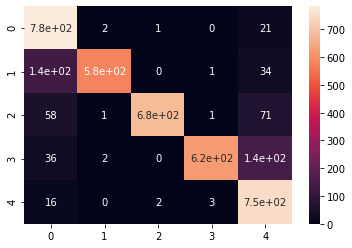

In [102]:
sns.heatmap(cm,annot=True)

In [100]:
print(metrics.classification_report(y_test,grid_random))

              precision    recall  f1-score   support

           0       0.76      0.97      0.85       807
           1       0.99      0.77      0.87       756
           2       1.00      0.84      0.91       816
           3       0.99      0.77      0.87       804
           4       0.74      0.97      0.84       773

    accuracy                           0.87      3956
   macro avg       0.89      0.87      0.87      3956
weighted avg       0.90      0.87      0.87      3956



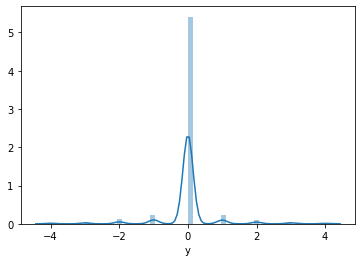

In [103]:
sns.distplot(y_test-grid_random)

In [ ]:
# we want the difference between test samples and predicted output should be as minimum as possible in the above graph it is 
# seen that the width of the Gaussian Distribution is very close 

In [78]:
from sklearn.ensemble import RandomForestClassifier

# n_estimators
rfc = RandomForestClassifier()# no of random tree=100 and it will sum up to give a decision 



In [79]:
rfc = RandomForestClassifier(n_estimators=1800,min_samples_split=2,min_samples_leaf=1,max_features='log2',max_depth=890,criterion='gini',bootstrap=True)

In [80]:
rfc.fit(x_train,y_train)

RandomForestClassifier(max_depth=890, max_features='log2', n_estimators=1800)

In [ ]:
# check for two rows whether currectly predicted or not 

In [87]:
rfc.predict([[0.550655389,0.907328738,0.379345777,0.948721814,0.835321623,0.374453584,0.636990269,0.557418898,0.360662132,1.568862751,0.047550013,0.634503251,0.1783414,0.962836241,0.518863259,0.062689036,0.257605593,0.039882614,6.027398443,0.47717275,0.9504568,0.766305378,0.482792358,0.289530625,0.950604429,0.999243609,0,0,1
]])

array([0], dtype=int64)

In [89]:
rfc.predict([[0.441926825,0.038244625,0.006163685,0.08115266,0.109665894,0.430880838,0.857197174,0.712602035,0.055780876,2.000680047,0.952623364,0.368952603,0.836422818,0.002392463,0.113846972,0.760724323,0.888493708,0.154093869,18.6911433,0.348500285,0.988937632,0.34483546,0.652726359,0.326963852,0.258284723,0.271377458,0,0,1]])


array([3], dtype=int64)

In [ ]:
# the prediction is correct

In [255]:
from sklearn.model_selection import cross_val_score

In [454]:
cro_val = cross_val_score(rfc,final_dataset,output_dataset,scoring='accuracy',cv=kf)

In [455]:
np.mean(cro_val)

0.8660219946909367

In [442]:
#...................... so the final accuracy score of the model using cross_val_score is near to 87%................................

In [2]:
import pickle# finally saving the model

In [ ]:
save_model=pickle.dumps(rfc)

In [ ]:
## Trying to further increase the accuracy by feature selection

In [157]:
rfc = RandomForestClassifier(n_estimators=1800,min_samples_split=2,min_samples_leaf=1,max_features='log2',max_depth=890,criterion='gini',bootstrap=True,random_state=0)

In [158]:
rfc.fit(x_train,y_train)

RandomForestClassifier(max_depth=890, max_features='log2', n_estimators=1000)

In [55]:
from sklearn.feature_selection import mutual_info_classif

In [56]:
mi = mutual_info_classif(x_train,y_train)

In [57]:
mi# seems like the output variable has have more or less similar dependency ecept the last three columnsS

array([0.28329294, 0.28535456, 0.28131877, 0.29085115, 0.29361591,
       0.28656109, 0.28706518, 0.27809342, 0.27310326, 0.29128698,
       0.28255091, 0.28124284, 0.28242066, 0.28251233, 0.29725164,
       0.29308673, 0.29248657, 0.30206469, 0.29979272, 0.29640939,
       0.29314345, 0.29935593, 0.29250995, 0.30651574, 0.30212202,
       0.29949241, 0.        , 0.00598488, 0.01618257])

In [58]:
x_train.columns

Index(['0', '1', '2', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '27',
       '28', 'Hot', 'Very Cold', 'Very Hot'],
      dtype='object')

In [62]:
val = pd.Series(mi,index=x_train.columns)

In [65]:
val.sort_values(ascending=False)

24           0.306516
27           0.302122
18           0.302065
19           0.299793
28           0.299492
22           0.299356
15           0.297252
20           0.296409
5            0.293616
21           0.293143
16           0.293087
23           0.292510
17           0.292487
10           0.291287
4            0.290851
7            0.287065
6            0.286561
1            0.285355
0            0.283293
11           0.282551
14           0.282512
13           0.282421
2            0.281319
12           0.281243
8            0.278093
9            0.273103
Very Hot     0.016183
Very Cold    0.005985
Hot          0.000000
dtype: float64

In [70]:
x_train.iloc[:,:-3]# training the model without the last three rows as columns like Very Hot, Very Cold and Hot are least depend features

,0,1,2,4,5,6,7,8,9,10,...,17,18,19,20,21,22,23,24,27,28
12315,0.653714,0.474930,0.344538,0.891904,0.042300,0.074438,0.794673,0.974569,0.518813,1.843681,...,0.728023,0.570195,46.511546,0.286039,0.438714,0.465180,0.007695,0.279267,0.526052,0.216430
26299,0.771305,0.866852,0.100465,0.641754,0.868585,0.112715,0.170891,0.079225,0.349458,0.362831,...,0.890338,0.140883,17.543391,0.377855,0.388946,0.042157,0.438698,0.198421,0.273722,0.788096
22266,0.690864,0.297498,0.103818,0.896107,0.125855,0.736802,0.452991,0.048958,0.571136,1.238751,...,0.563572,0.382476,26.555250,0.093214,0.533604,0.443754,0.777890,0.697085,0.954686,0.088452
23098,0.052600,0.901294,0.543600,0.173386,0.350686,0.741760,0.462338,0.307583,0.334421,1.511681,...,0.756266,0.445145,38.664790,0.816320,0.264584,0.035479,0.102583,0.549997,0.244731,0.497814
19033,0.457993,0.966693,0.040438,0.602306,0.380595,0.761440,0.883903,0.349161,0.807612,1.994504,...,0.601417,0.604910,41.380320,0.903823,0.837318,0.949226,0.128974,0.265629,0.741901,0.594314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,0.048161,0.002494,0.791009,0.713106,0.462921,0.576871,0.779680,0.643959,0.884078,2.000509,...,0.239023,0.482348,16.529212,0.412739,0.067330,0.003366,0.100120,0.125885,0.035023,0.408062
19648,0.868598,0.100252,0.072076,0.635326,0.675031,0.848985,0.486090,0.991114,0.119011,2.326189,...,0.303849,0.564698,22.158270,0.170952,0.118464,0.213464,0.262088,0.985790,0.605327,0.697591
9845,0.872323,0.885693,0.354613,0.083071,0.173523,0.750812,0.020394,0.992296,0.788963,1.763502,...,0.352008,0.631160,27.217335,0.943064,0.743959,0.554755,0.544142,0.913991,0.076525,0.414307
10799,0.523894,0.993814,0.221597,0.333230,0.815828,0.235462,0.216911,0.703326,0.235003,1.155698,...,0.262576,0.152811,9.012447,0.478804,0.141910,0.370047,0.177033,0.679112,0.567437,0.716225


In [61]:
rfc.fit(x_train.iloc[:,:-3],y_train)

RandomForestClassifier(max_depth=890, max_features='log2', n_estimators=1800)

In [62]:
rfc.score(x_test.iloc[:,:-3],y_test)

0.8455510616784631

In [ ]:
# I have used VarianceThreshold before for feature selection and now used  mutual infomation technique for feature seletion
# but seen after training the model without the last three features the score reduces from 87 to 85 so the model is performing well 
# without feature selection

In [ ]:
#Testing with SVM

In [178]:
from sklearn.feature_selection import VarianceThreshold

In [179]:
var_thes = VarianceThreshold(threshold=0.1)

In [180]:
var_thes.fit(x_train) 

VarianceThreshold(threshold=0.1)

In [181]:
const_columns=[c for c in x_train.columns if c not in x_train.columns[var_thes.get_support()]]

In [185]:
len(const_columns)

15

In [186]:
x_train.drop(const_columns,axis=1,inplace=True)

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [187]:
x_train

,4,8,9,10,12,13,15,18,19,20,21,Hot,Very Cold,Very Hot
12315,0.891904,0.974569,0.518813,1.843681,0.752921,0.988641,0.544377,0.570195,46.511546,0.286039,0.438714,1,0,0
26299,0.976671,0.959885,0.831007,2.316080,0.724904,0.657660,0.561517,0.249135,15.822290,0.296765,0.690986,0,1,0
22266,0.171294,0.590894,0.547283,1.228968,0.241985,0.163054,0.817472,0.238937,13.445564,0.568227,0.600580,0,0,1
23098,0.180288,0.868665,0.562358,1.677238,0.142834,0.366137,0.379895,0.427569,42.984129,0.507839,0.310926,1,0,0
19033,0.376755,0.656342,0.106422,1.735583,0.280095,0.039702,0.543514,0.247014,9.298434,0.525822,0.630982,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,0.713106,0.643959,0.884078,2.000509,0.801903,0.245252,0.525603,0.482348,16.529212,0.412739,0.067330,0,1,0
19648,0.803648,0.875165,0.518276,2.259916,0.961960,0.486737,0.521496,0.451578,11.381965,0.675171,0.610225,0,0,1
9845,0.083071,0.992296,0.788963,1.763502,0.496344,0.755610,0.025877,0.631160,27.217335,0.943064,0.743959,0,1,0
10799,0.333230,0.703326,0.235003,1.155698,0.284995,0.927089,0.160895,0.152811,9.012447,0.478804,0.141910,1,0,0


In [161]:
from sklearn.svm import SVC

In [190]:
model = SVC(C=1,kernel='poly')

In [191]:
model.fit(final_train_dataset,y_train)

SVC(C=1, kernel='poly')

In [192]:
model.score(final_test_dataset,y_test)

0.5740647118301314

I have used three Machine Learning for this dataset KNN, Random Forest and SVM the most accuracy score got from a model is around 87% using Random Forest Classifier